# Machine Learning Part 1: Regression Analysis

## Contents

### 01. Import libraries and data
### 02. Data cleaning 
### 03.Data prep for regression analysis
#### state's "reputation"  album average search score vs.
#### state's overall google search score average  
### 04. Regression analysis 
### 05. Performance improvement after removing outliers

# 01. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Show all graphs within cells

%matplotlib inline

In [3]:
path = r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis"

In [4]:
df= pd.read_csv(os.path.join(path, '02 Manipulated Data', 'final_goog.csv'), index_col=0)

# 02. Data cleaning

In [5]:
df.head(20)

,state,g_search_score,album_event,album_id,album_release_date,periods_from_release,us_search_avg,alb_num_x,tv,state_num,...,dance_m,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m,_merge
0,Alabama,0,Debut,DEBUT,2006-10-24,-2,69,1,original,1,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
1,Alaska,0,Debut,DEBUT,2006-10-24,-2,69,1,original,2,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
2,Arizona,8,Debut,DEBUT,2006-10-24,-2,69,1,original,3,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
3,Arkansas,46,Debut,DEBUT,2006-10-24,-2,69,1,original,4,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
4,California,3,Debut,DEBUT,2006-10-24,-2,69,1,original,5,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
5,Colorado,7,Debut,DEBUT,2006-10-24,-2,69,1,original,6,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
6,Connecticut,0,Debut,DEBUT,2006-10-24,-2,69,1,original,7,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
7,Delaware,0,Debut,DEBUT,2006-10-24,-2,69,1,original,8,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
8,District of Columbia,0,Debut,DEBUT,2006-10-24,-2,69,1,original,9,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
9,Florida,6,Debut,DEBUT,2006-10-24,-2,69,1,original,10,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both


In [6]:
df.shape

(3672, 92)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3671
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state                       3672 non-null   object 
 1   g_search_score              3672 non-null   int64  
 2   album_event                 3672 non-null   object 
 3   album_id                    3672 non-null   object 
 4   album_release_date          3672 non-null   object 
 5   periods_from_release        3672 non-null   int64  
 6   us_search_avg               3672 non-null   int64  
 7   alb_num_x                   3672 non-null   int64  
 8   tv                          3672 non-null   object 
 9   state_num                   3672 non-null   int64  
 10  alb_group_st_search_avg     3672 non-null   int64  
 11  st_overall_search_avg       3672 non-null   int64  
 12  st_group_alb_search_avg     3672 non-null   int64  
 13  tvflag                      3672 non-n

In [8]:
df.columns

Index(['state', 'g_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num_x', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_

In [9]:
# rename columns for brevity

df.rename(columns = {'g_search_score': 'st_search_score', 
                     'w1_trad_album_sales':'alb_sales',
                     'tot_alb_plays': 'alb_streams',
                     'alb_streams_norm':'alb_stream_n',
                     'st_overall_search_avg':'st_avg_score',
                    'pop_genre_search_avg': 'st_pop_avg',
                    'country_genre_search_avg': 'st_country_avg',
                    'rock_genre_search_avg': 'st_rock_avg',
                    'alt_genre_search_avg': 'st_alt_avg',
                    'REP_avg_score': 'rep_st_avg_score'}
                      , inplace=True)

In [10]:
df.columns

Index(['state', 'st_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num_x', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_avg_score', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'rep_st_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_sum',

### Data types

In [11]:
# Check data types for revant variables

df['rep_st_avg_score'].dtype

dtype('float64')

In [12]:
# Check data types for revant variables

df['st_avg_score'].dtype

dtype('int64')

In [13]:
# Convert state average score to float

df['st_avg_score'] = df['st_avg_score'].astype(float)

In [14]:
df['st_avg_score'].dtype

dtype('float64')

#### Missing Values

In [15]:
# Check for missing values

df.isnull().sum()

# None found

state                 0
st_search_score       0
album_event           0
album_id              0
album_release_date    0
                     ..
speech_m              0
temp_m                0
val_m                 0
dur_m                 0
_merge                0
Length: 92, dtype: int64

#### Duplicates

In [16]:
df_dups = df.duplicated()

In [17]:
df_dups.shape # no dups

(3672,)

#### Extreme values checks

In [18]:
df.columns

Index(['state', 'st_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num_x', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_avg_score', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'rep_st_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_sum',

C:\Users\leobs\AppData\Local\Temp\ipykernel_37276\3224259991.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['st_avg_score'], bins=25)


<Axes: xlabel='st_avg_score', ylabel='Density'>

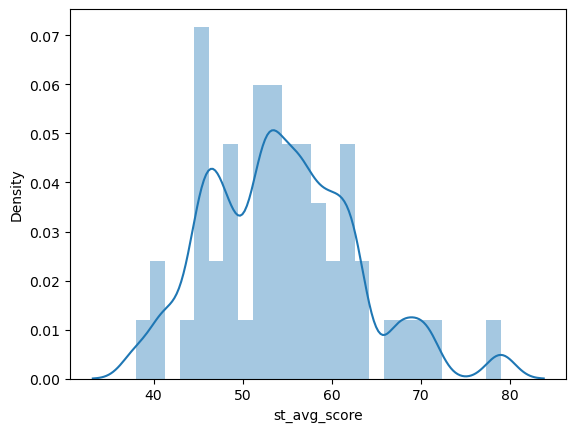

In [19]:
sns.distplot(df['st_avg_score'], bins=25)  

Observations on outliers: There are outliers, particularly averages 65 and below 45. Will try without then consider removal.

In [20]:
df['st_avg_score'].value_counts(dropna=False)

st_avg_score
52.0    360
57.0    288
45.0    216
46.0    216
59.0    216
62.0    216
54.0    216
41.0    144
53.0    144
49.0    144
60.0    144
48.0    144
55.0    144
47.0    144
63.0    144
56.0    144
70.0     72
38.0     72
61.0     72
50.0     72
67.0     72
68.0     72
43.0     72
79.0     72
71.0     72
Name: count, dtype: int64

In [21]:
df['st_avg_score'].mean() # Check the mean

54.450980392156865

In [22]:
df['st_avg_score'].median() # Check the median

54.0

In [23]:
df['st_avg_score'].max() # Check the max

79.0

In [24]:
df['st_avg_score'].min() # Check the min

38.0

# 03. Data prep for regression analysis
# Variables REP_avg_score (for each state) and st_avg_score (across all albums and periods)

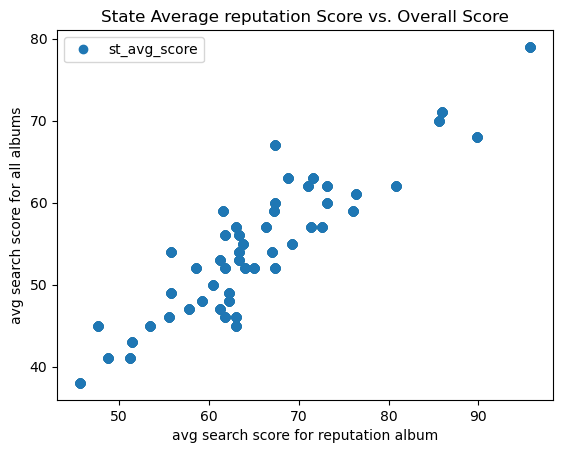

In [25]:
# Create a scatterplot using matplotlib to review variables comparing

df.plot(x = 'rep_st_avg_score', y='st_avg_score',style='o') 
plt.title("State Average reputation Score vs. Overall Score")  
plt.xlabel("avg search score for reputation album")  
plt.ylabel("avg search score for all albums")  
plt.show()

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['rep_st_avg_score'].values.reshape(-1,1)
y = df['st_avg_score'].values.reshape(-1,1)

In [27]:
X

array([[65. ],
       [55.6],
       [62.2],
       ...,
       [61.8],
       [63.4],
       [47.6]])

In [28]:
y

array([[52.],
       [46.],
       [49.],
       ...,
       [56.],
       [56.],
       [45.]])

In [29]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 04 Regression analysis

In [30]:
# Create a regression object.

regression = LinearRegression() 

In [31]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

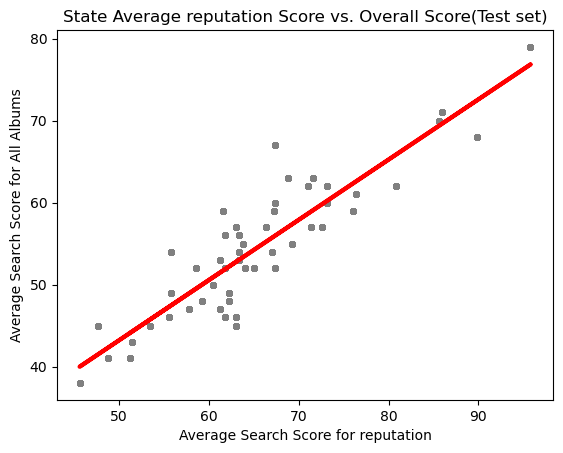

In [33]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title("State Average reputation Score vs. Overall Score(Test set)")
plot_test.xlabel('Average Search Score for reputation')
plot_test.ylabel('Average Search Score for All Albums')
plot_test.show()

In [34]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [35]:
# Print the model summary statistics to evaluate model performance

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.73482361]]
Mean squared error:  13.868814316999691
R2 score:  0.7924501686702725


#### Observations: 

The slope indicates a positive relationship at a degree of 73.49

The root mean squared error estimates how close the regression line is to a set of points. The value 13.9 indicates a fairly accurate model

The R2 score tells how well the model explains the variance in the data. The value of 79 indicates a good fit. This score also supports these variables having a linear relationship.

In [36]:
y_predicted

array([[44.0884905 ],
       [52.75940914],
       [51.73065608],
       ...,
       [51.43672664],
       [49.52618524],
       [52.75940914]])

In [37]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,41.0,44.088491
1,57.0,52.759409
2,59.0,51.730656
3,62.0,60.254610
4,41.0,44.088491
5,50.0,50.848868
6,63.0,59.078892
7,60.0,60.254610
8,52.0,54.229056
9,45.0,41.443125


### The dataframe shows similar values between the actual y scores and predicted values. 

## Compare how regression fits the training set

In [38]:
# Predict the X train

y_predicted_train = regression.predict(X_train) 

In [39]:
rmse_predic = mean_squared_error(y_train, y_predicted_train)
r2_predic = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_predic)
print('R2 score: ', r2_predic)

Slope: [[0.73482361]]
Mean squared error:  13.521835884526642
R2 score:  0.8073023502563371


#### Similar to the test set, the model fits the training set well, an R2 score of .81

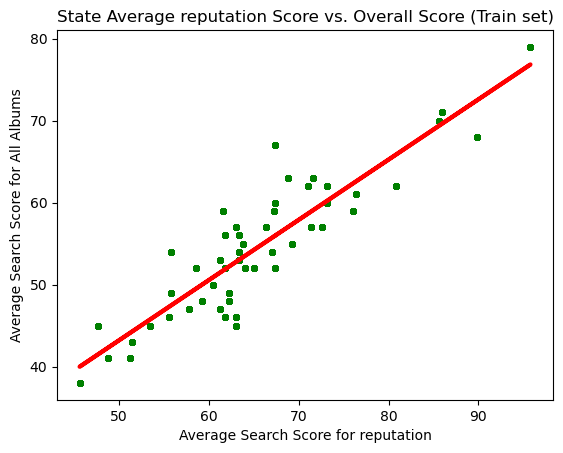

In [41]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title("State Average reputation Score vs. Overall Score (Train set)")
plot_test.xlabel('Average Search Score for reputation')
plot_test.ylabel('Average Search Score for All Albums')
plot_test.show()


# 05. Performance improvement after remove outliers

The model proved to be a good fit and outliers are important because they will help with various predictions about albums, states, and songs. 

In [42]:
df['st_avg_score'].value_counts(dropna=False)

st_avg_score
52.0    360
57.0    288
45.0    216
46.0    216
59.0    216
62.0    216
54.0    216
41.0    144
53.0    144
49.0    144
60.0    144
48.0    144
55.0    144
47.0    144
63.0    144
56.0    144
70.0     72
38.0     72
61.0     72
50.0     72
67.0     72
68.0     72
43.0     72
79.0     72
71.0     72
Name: count, dtype: int64

C:\Users\leobs\AppData\Local\Temp\ipykernel_37276\2779701959.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['st_avg_score'], bins=25)


<Axes: xlabel='st_avg_score', ylabel='Density'>

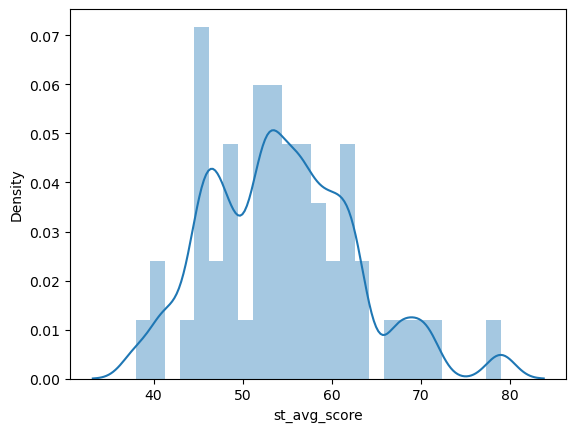

In [43]:
sns.distplot(df['st_avg_score'], bins=25) 


In [44]:
df['st_avg_score'].describe()

count    3672.000000
mean       54.450980
std         8.319112
min        38.000000
25%        48.000000
50%        54.000000
75%        60.000000
max        79.000000
Name: st_avg_score, dtype: float64

In [45]:
df.shape

(3672, 92)

In [46]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test_out_remove = df[(df['st_avg_score'] >= 45.0) & (df['st_avg_score'] <= 75.0)] 

In [47]:
df_test_out_remove.shape

(3312, 92)

C:\Users\leobs\AppData\Local\Temp\ipykernel_37276\2828926135.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test_out_remove['st_avg_score'], bins=25)


<Axes: xlabel='st_avg_score', ylabel='Density'>

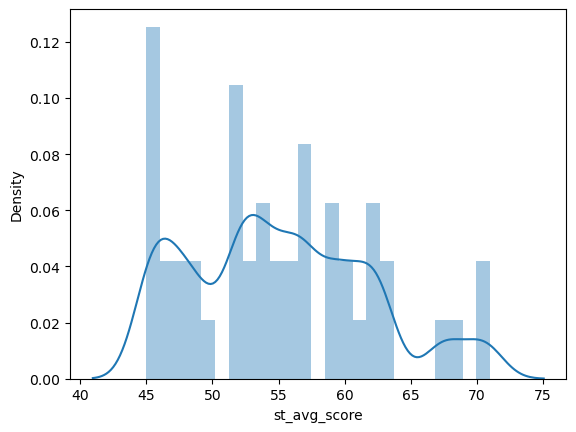

In [48]:
sns.distplot(df_test_out_remove['st_avg_score'], bins=25) 

This value for outlier removal skews the distribution right because there are a lot of values just over a state average of 45. 

C:\Users\leobs\AppData\Local\Temp\ipykernel_37276\840202950.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['st_search_score'], bins=25)


<Axes: xlabel='st_search_score', ylabel='Density'>

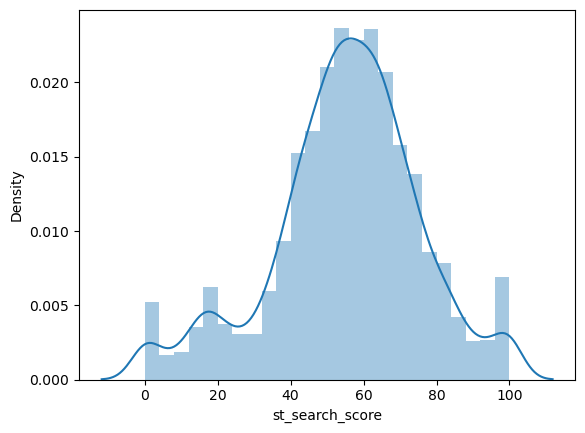

In [49]:
# Review histogram for all google scores

sns.distplot(df['st_search_score'], bins=25) 

In [50]:
# Review full dataframe state averages- can use a mean of an avg since it's the same value

st_avg_review = df.groupby('state')['st_avg_score'].mean().reset_index()

In [51]:
sorted_st_avg_review = st_avg_review.sort_values(by='st_avg_score', ascending=False)


In [52]:
sorted_st_avg_review

,state,st_avg_score
39,Rhode Island,79.0
44,Utah,71.0
21,Massachusetts,70.0
8,District of Columbia,68.0
29,New Hampshire,67.0
38,Pennsylvania,63.0
6,Connecticut,63.0
27,Nebraska,62.0
42,Tennessee,62.0
19,Maine,62.0


#### Based on the above averages, I am choosing to remove Rhode Island (79) and Hawaii (38) by making the df have averages greater than 40 and less than 72.

In [53]:
# Re-define the extreme values

df_test_out_remove = df[(df['st_avg_score'] >40.00) & (df['st_avg_score'] < 72.00)] 

C:\Users\leobs\AppData\Local\Temp\ipykernel_37276\1128327830.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test_out_remove['st_avg_score'], bins=25)


<Axes: xlabel='st_avg_score', ylabel='Density'>

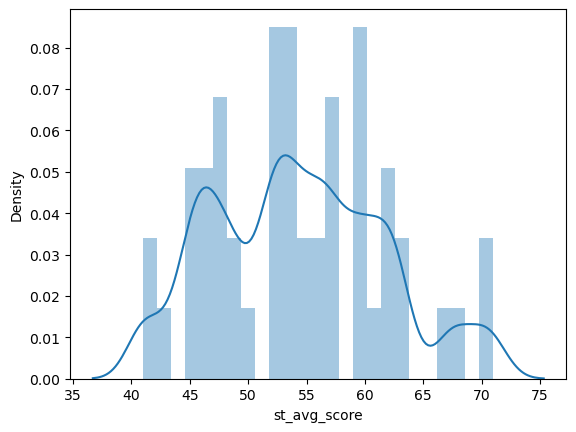

In [54]:
# Review the state search score histogram again after removing observations with low/high st averages

sns.distplot(df_test_out_remove['st_avg_score'], bins=25) 

C:\Users\leobs\AppData\Local\Temp\ipykernel_37276\1157112257.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test_out_remove['st_search_score'], bins=25)


<Axes: xlabel='st_search_score', ylabel='Density'>

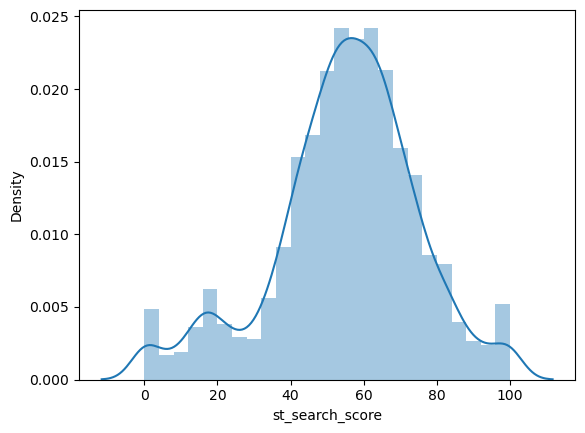

In [55]:
# Review histogram for all google scores (not just averages)

sns.distplot(df_test_out_remove['st_search_score'], bins=25) 

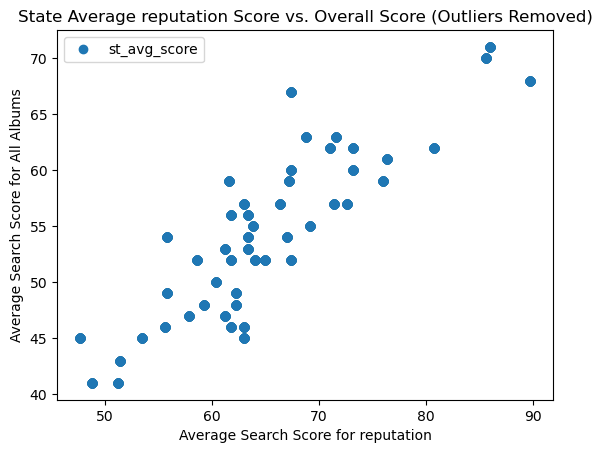

In [56]:
# See how the scatterplot looks without outliers.

df_test_out_remove.plot(x = 'rep_st_avg_score', y='st_avg_score', style='o')  
plt.title("State Average reputation Score vs. Overall Score (Outliers Removed)")  
plt.xlabel('Average Search Score for reputation')  
plt.ylabel('Average Search Score for All Albums')  
plt.show()


In [57]:
# Reshape again.

X_2 = df_test_out_remove['rep_st_avg_score'].values.reshape(-1,1)
y_2 = df_test_out_remove['st_avg_score'].values.reshape(-1,1)

In [58]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [59]:
# Run and fit the regression.

regression2 = LinearRegression()  
regression2.fit(X_train_2, y_train_2)

LinearRegression()

In [60]:
# Predict.

y_predicted_2 = regression2.predict(X_test_2)

In [61]:
rmse_pred_2 = mean_squared_error(y_test_2, y_predicted_2)
r2_pred_2 = r2_score(y_test_2, y_predicted_2)

In [62]:
print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse_pred_2)
print('R2 score: ', r2_pred_2)

Slope: [[0.71302052]]
Mean squared error:  13.996597983609767
R2 score:  0.7480685146886163


The model fits slightly worse than without the outliers (1 top and 1 worst states) removed. Will stick with original model since the R2 score is better and because all albums are important. 

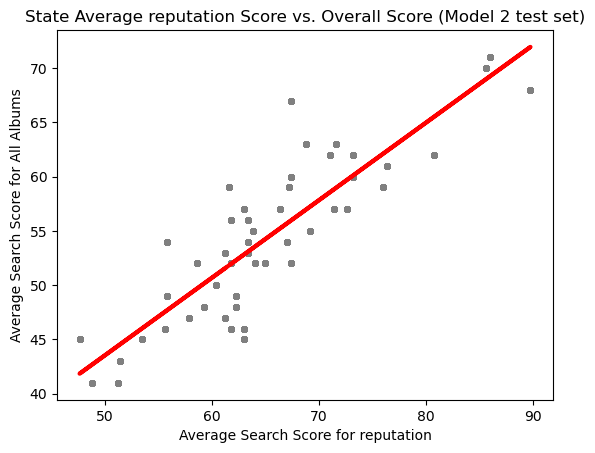

In [63]:
# Visualizing the test set results.
plot_test2 = plt
plot_test2.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test2.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test2.title("State Average reputation Score vs. Overall Score (Model 2 test set)")
plot_test2.xlabel('Average Search Score for reputation')
plot_test2.ylabel('Average Search Score for All Albums')
plot_test2.show()




In [64]:
data_improve = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data_improve.head(30)

,Actual,Predicted
0,52.0,51.977248
1,52.0,54.258913
2,49.0,47.699124
3,55.0,53.403289
4,62.0,60.105682
5,53.0,53.118080
6,52.0,51.977248
7,62.0,65.524638
8,48.0,52.262456
9,67.0,55.970163


### Since the second model attempt fit worse, I examined the quartile ranges for the whole df

In [65]:
# Find interquartile ranges to set parameters

q1 = df['st_avg_score'].quantile(0.25)
q3 = df['st_avg_score'].quantile(0.75)
iqr = q3 - q1

# Display the results
print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")

Q1: 48.0
Q3: 60.0
IQR: 12.0


#### I originally remove values <=40 and >= 72

However:
Q1- 1.5 x 12 = 30 and  
Q3 + 1.5 x 12 = 78

No values in the variable fit the criteria for a statistical outlier. Therefore, there are no statistical outliers even though there are certain high and low values. 

I choose to not remove values on the high and low end and use my original model. 

In [66]:
df.columns

Index(['state', 'st_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num_x', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_avg_score', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'rep_st_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_sum',

In [67]:
# Check

REP_tv_corrs = df[['st_search_score','st_avg_score', 'rep_st_avg_score', 'alb_sales', 'alb_streams']]

In [68]:
REP_tv_corrs.corr()

,st_search_score,st_avg_score,rep_st_avg_score,alb_sales,alb_streams
st_search_score,1.000000,4.078849e-01,3.657946e-01,3.863520e-01,3.447550e-01
st_avg_score,0.407885,1.000000e+00,8.961387e-01,8.723734e-18,-2.383484e-17
rep_st_avg_score,0.365795,8.961387e-01,1.000000e+00,-2.053624e-15,-1.475380e-15
alb_sales,0.386352,8.723734e-18,-2.053624e-15,1.000000e+00,3.821332e-01
alb_streams,0.344755,-2.383484e-17,-1.475380e-15,3.821332e-01,1.000000e+00


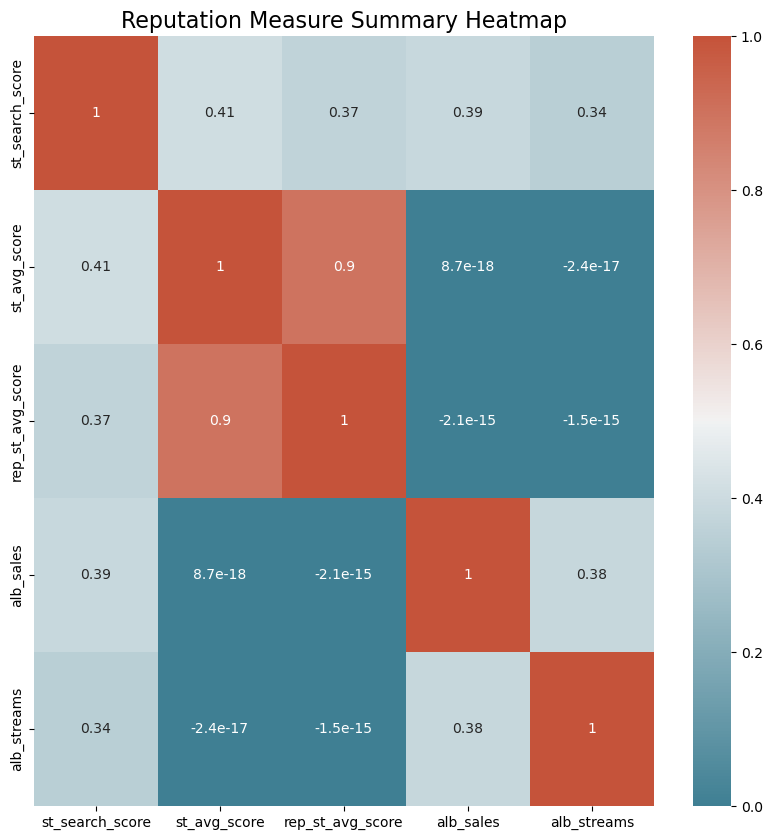

In [69]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

cmap = sns.diverging_palette(2020, 19, as_cmap=True) 

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
REP_st_avg_corr_summary_heatmap= sns.heatmap(REP_tv_corrs.corr(), annot = True, cmap=cmap, ax = ax)
plt.title("Reputation Measure Summary Heatmap", fontsize=16)
plt.show()

In [70]:
# Save figure

REP_st_avg_corr_summary_heatmap.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'REP_st_avg_corr_summary_heatmap.png'))

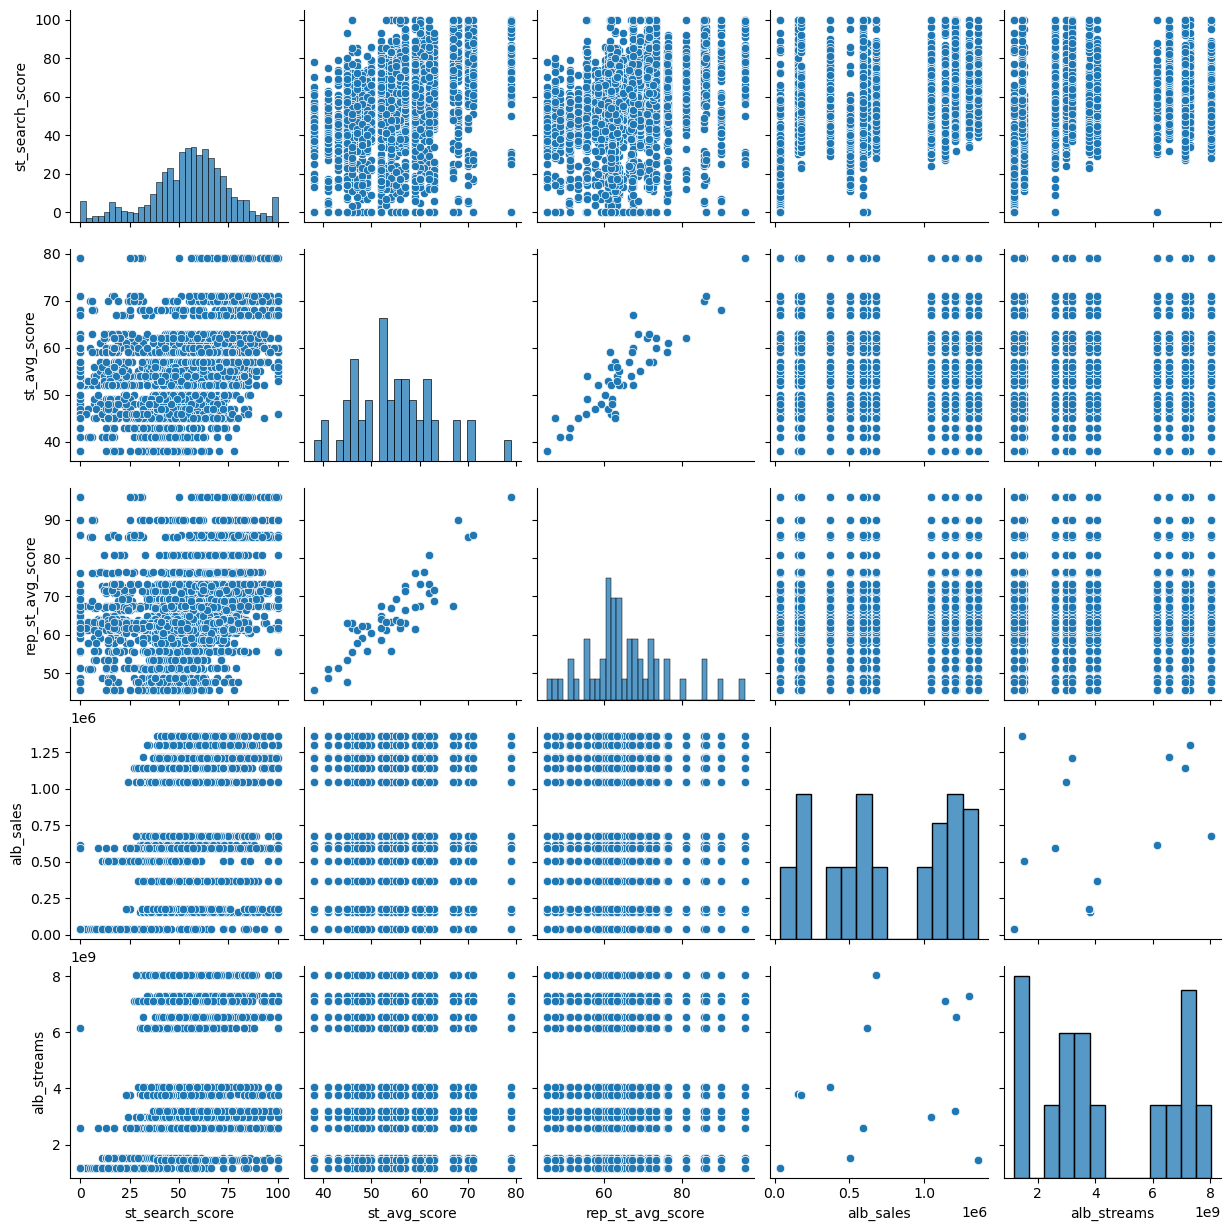

In [71]:
# Create pair plot
REP_pairplot = sns.pairplot(REP_tv_corrs)

As shown above, rep_st_avg_score and st_avg_score have a clear linear relationship, unlike any other key variables from above.

This is relevant from a prior script. Curious about how this relationships interacts with REP search average. 
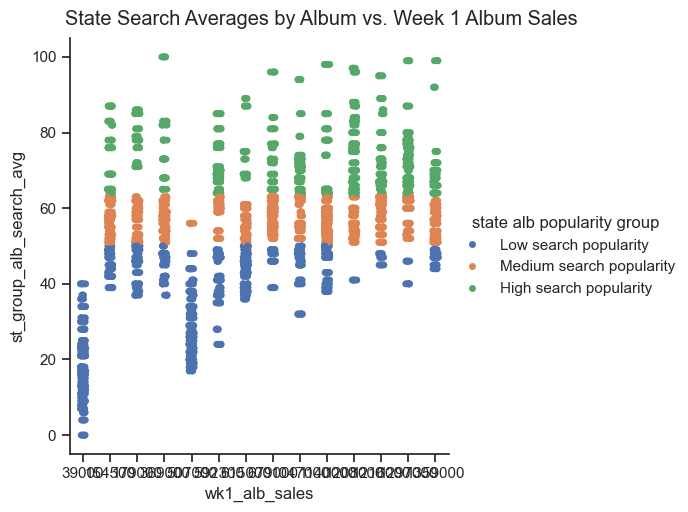 

# Overall observations: 
These were the stats from the linear regression between REP_avg_score and st_overall_search_avg

Slope: [[0.73482361]]
Mean squared error:  13.868814316999691
R2 score:  0.7924501686702725

## The model proved to be a good fit for the variables REP_avg_score and st_overall_search_avg. This suggests a linear relationship between the variables. 